<a href="https://colab.research.google.com/github/javeed999/DSA/blob/main/KNNRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate dataset
x, y = make_classification(
    n_samples=1000,        # number of samples
    n_features=2,        # two independent features
    n_informative=2,     # both features are useful
    n_redundant=0,       # no redundant features
    n_clusters_per_class=2,
    random_state=42
)

# Convert to DataFrame for easy viewing
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = y

print(df)


           X1        X2  Y
0    0.601034  1.535353  1
1    0.755945 -1.172352  1
2    1.354479 -0.948528  1
3    3.103090  0.233485  1
4    0.753178  0.787514  1
..        ...       ... ..
995  1.713939  0.451639  0
996  1.509473 -0.794996  1
997  2.844315  0.211294  0
998 -0.025876  1.619258  0
999  3.641478  0.756925  0

[1000 rows x 3 columns]


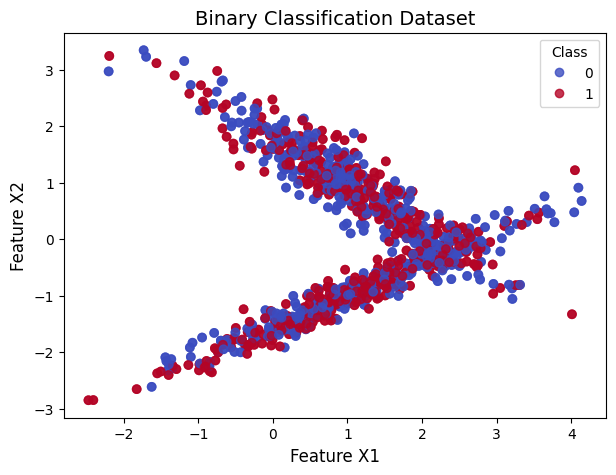

In [58]:
import matplotlib.pyplot as plt

# Scatter plot with colors based on Y
plt.figure(figsize=(7,5))
plt.scatter(df["X1"], df["X2"], c=df["Y"], cmap="coolwarm", alpha=0.8)

# Labels & title
plt.xlabel("Feature X1", fontsize=12)
plt.ylabel("Feature X2", fontsize=12)
plt.title("Binary Classification Dataset", fontsize=14)

# Add legend
scatter = plt.scatter(df["X1"], df["X2"], c=df["Y"], cmap="coolwarm",   alpha=0.8)
legend1 = plt.legend(*scatter.legend_elements(), title="Class")

plt.show()


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=2,algorithm="auto")
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [93]:
y_pred=classifier.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
score=accuracy_score(y_test,y_pred)
print("mse: ",mean_squared_error(y_test,y_pred))
print("mae: ",mean_absolute_error(y_test,y_pred))
print("rmse: ",root_mean_squared_error(y_test,y_pred))
print("R2_scorre: ",r2_score(y_test,y_pred))
print(score)

mse:  0.11
mae:  0.11
rmse:  0.33166247903553997
R2_scorre:  0.5599217638691323
0.89


# ***GRID Search CV***

In [95]:
params={"n_neighbors":[1,2,3,4,5,6], "weights": ["uniform", "distance"],"p": [1, 2],"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=classifier,param_grid=params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [96]:
y_pred=grid.predict(x_test)
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
score=accuracy_score(y_test,y_pred)
print("mse: ",mean_squared_error(y_test,y_pred))
print("mae: ",mean_absolute_error(y_test,y_pred))
print("rmse: ",root_mean_squared_error(y_test,y_pred))
print("R2_scorre: ",r2_score(y_test,y_pred))
print(score)

mse:  0.06333333333333334
mae:  0.06333333333333334
rmse:  0.2516611478423583
R2_scorre:  0.7466216216216216
0.9366666666666666


In [97]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}